In [252]:
import numpy as np
import matplotlib.pyplot as plt

In [253]:
pepega = 1000
s1 = np.zeros(pepega)
i1 = np.zeros(pepega)
r1 = np.zeros(pepega)
s1[0] = 0.999
i1[0] = 0.001
r1[0] = 0

In [254]:
lamba = 3.0
mu = 1.0

In [255]:
def func(s1,i1,r1):
  s_new = (-1 * lamba * s1 * i1)
  i_new = (lamba * s1 * i1 - mu * i1)
  r_new = (mu * i1)

  return s_new, i_new, r_new

for z in range(1,pepega):
  new_s, new_i, new_r = func(s1[z-1],i1[z-1],r1[z-1])

  s1[z] = s1[z-1] + 0.05 * new_s
  i1[z] = i1[z-1] + 0.05 * new_i
  r1[z] = r1[z-1] + 0.05 * new_r

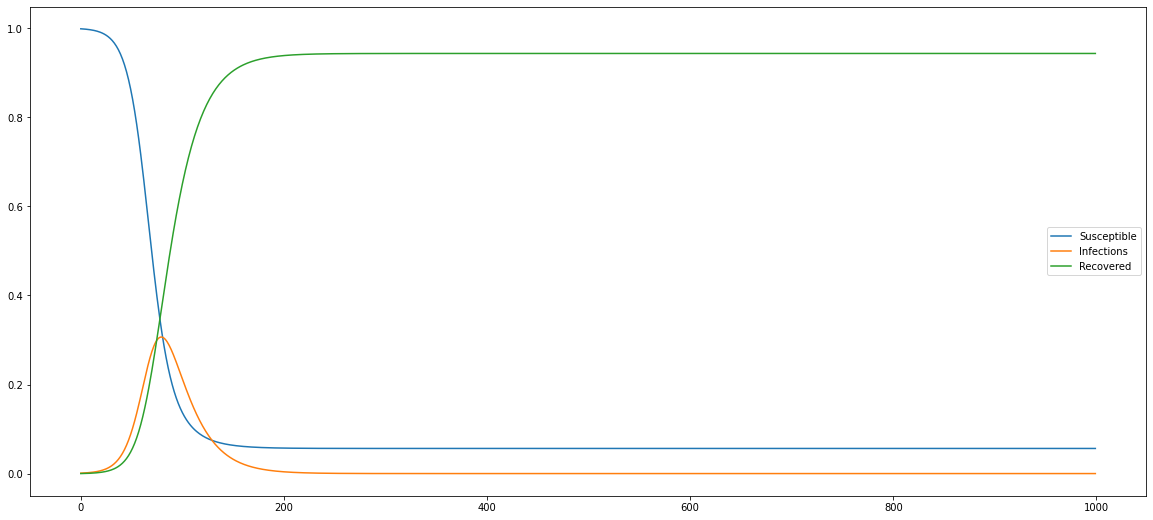

In [256]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,9))
ax = fig.add_subplot(111)


plt.plot(s1, label = 'Susceptible')

plt.plot(i1, label = 'Infections')

plt.plot(r1, label = 'Recovered')

plt.legend()

#Gillespie

In [257]:
import math as math
steps = 1900
t_break = 1000
t = np.zeros(steps)
s = np.zeros(steps)
i = np.zeros(steps)
r = np.zeros(steps)
s[0] = 0.999
i[0] = 0.001
r[0] = 0
t[0] = 0
lamba = 5.0
mu = 1.0

for k in range(1,steps):
  # if t[k] > t_break:
  #   break
  uno = s[k-1] * lamba * i[k-1]
  dos = mu * i[k-1]
  t[k] = t[k-1]  - math.log(1 -np.random.uniform(0,1))/(uno+dos) #np.random.exponential(uno + dos)
  if np.random.uniform(0,1)  < uno/(uno + dos):
    s[k] = s[k-1] - 0.001
    i[k] = i[k-1] + 0.001
    r[k] = r[k-1]
  else:
    s[k] = s[k-1]
    i[k] = i[k-1] - 0.001
    r[k] = r[k-1] + 0.001

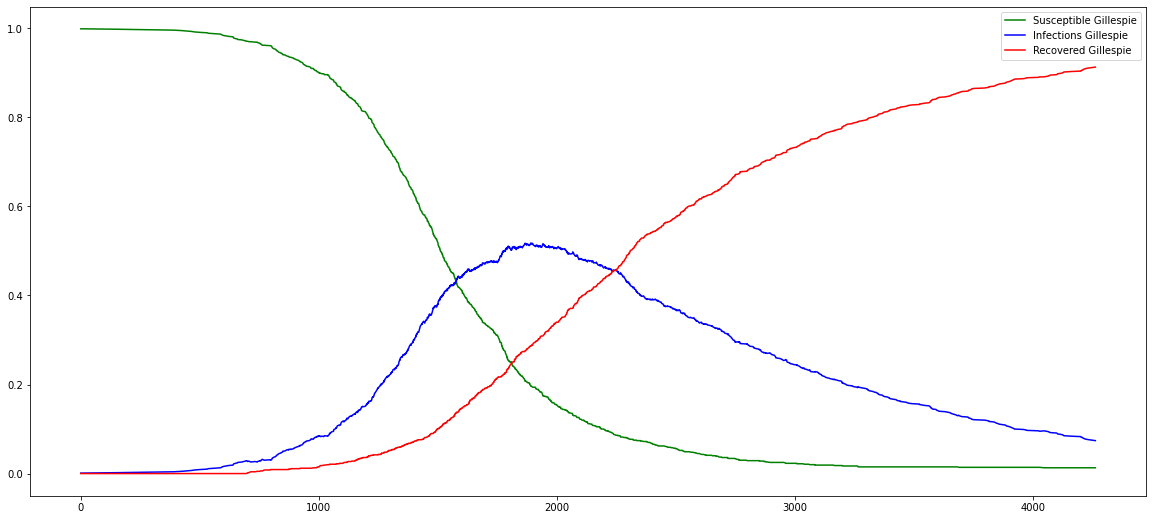

In [258]:
fig = plt.figure(figsize = (20,9))
ax = fig.add_subplot(111)

plt.plot(t,s,c = 'g',label = 'Susceptible Gillespie')

plt.plot(t,i, c='b', label = 'Infections Gillespie')

plt.plot(t,r, c = 'r',label = 'Recovered Gillespie')

plt.legend()